There is an undirected connected tree with n nodes labeled from 0 to n - 1 and n - 1 edges.

You are given a 0-indexed integer array nums of length n where nums[i] represents the value of the ith node. You are also given a 2D integer array edges of length n - 1 where edges[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the tree.

Remove two distinct edges of the tree to form three connected components. For a pair of removed edges, the following steps are defined:

    Get the XOR of all the values of the nodes for each of the three components respectively.
    The difference between the largest XOR value and the smallest XOR value is the score of the pair.

    For example, say the three components have the node values: [4,5,7], [1,9], and [3,3,3]. The three XOR values are 4 ^ 5 ^ 7 = 6, 1 ^ 9 = 8, and 3 ^ 3 ^ 3 = 3. The largest XOR value is 8 and the smallest XOR value is 3. The score is then 8 - 3 = 5.

Return the minimum score of any possible pair of edge removals on the given tree.

 

Example 1:

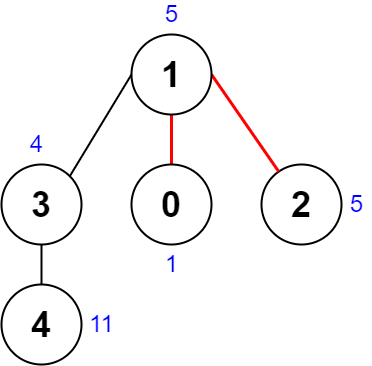

Input: nums = [1,5,5,4,11], edges = [[0,1],[1,2],[1,3],[3,4]]
Output: 9
Explanation: The diagram above shows a way to make a pair of removals.
- The 1st component has nodes [1,3,4] with values [5,4,11]. Its XOR value is 5 ^ 4 ^ 11 = 10.
- The 2nd component has node [0] with value [1]. Its XOR value is 1 = 1.
- The 3rd component has node [2] with value [5]. Its XOR value is 5 = 5.
The score is the difference between the largest and smallest XOR value which is 10 - 1 = 9.
It can be shown that no other pair of removals will obtain a smaller score than 9.

Example 2:

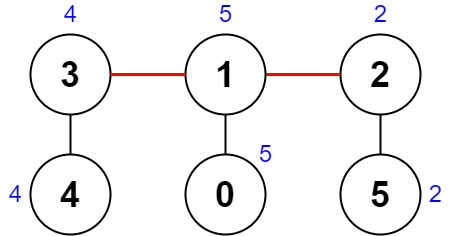

Input: nums = [5,5,2,4,4,2], edges = [[0,1],[1,2],[5,2],[4,3],[1,3]]
Output: 0
Explanation: The diagram above shows a way to make a pair of removals.
- The 1st component has nodes [3,4] with values [4,4]. Its XOR value is 4 ^ 4 = 0.
- The 2nd component has nodes [1,0] with values [5,5]. Its XOR value is 5 ^ 5 = 0.
- The 3rd component has nodes [2,5] with values [2,2]. Its XOR value is 2 ^ 2 = 0.
The score is the difference between the largest and smallest XOR value which is 0 - 0 = 0.
We cannot obtain a smaller score than 0.

 

Constraints:

    n == nums.length
    3 <= n <= 1000
    1 <= nums[i] <= 108
    edges.length == n - 1
    edges[i].length == 2
    0 <= ai, bi < n
    ai != bi
    edges represents a valid tree.



In [ ]:
class Solution:
    def calc(self, part1: int, part2: int, part3: int) -> int:
        return max(part1, part2, part3) - min(part1, part2, part3)
    def minimumScore(self, nums: List[int], edges: List[List[int]]) -> int:
        n = len(nums)
        e = [[] for _ in range(n)]
        for u, v in edges:
            e[u].append(v)
            e[v].append(u)

        total = 0
        for x in nums:
            total ^= x

        res = float("inf")

        def dfs2(x: int, f: int, oth: int, anc: int) -> int:
            son = nums[x]
            for y in e[x]:
                if y == f:
                    continue
                son ^= dfs2(y, x, oth, anc)
            if f == anc:
                return son
            nonlocal res
            res = min(res, self.calc(oth, son, total ^ oth ^ son))
            return son

        def dfs(x: int, f: int) -> int:
            son = nums[x]
            for y in e[x]:
                if y == f:
                    continue
                son ^= dfs(y, x)
            for y in e[x]:
                if y == f:
                    dfs2(y, x, son, x)
            return son

        dfs(0, -1)
        return res